In [93]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [94]:
training_gray = cv2.imread('stopka.jpg', 0)
training_rgb = cv2.cvtColor(training_gray, cv2.COLOR_BGR2RGB)

In [95]:
# zmensime rozlisenie obrazka
test_image = cv2.pyrDown(training_rgb)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]
# ulozime si pocet riadkov a stlpcov = rozmer testovacieho obrazka
# vytvorime rotacnu maticu; getRotationMatrix2D(stred_rotacie, uhol, mierka)
rotation_matrix = cv2.getRotationMatrix2D((num_cols / 2, num_rows / 2), 30, 1)
# testovaci obrazok prekrutime podla rotacnej matice - zrotujeme
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))
test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

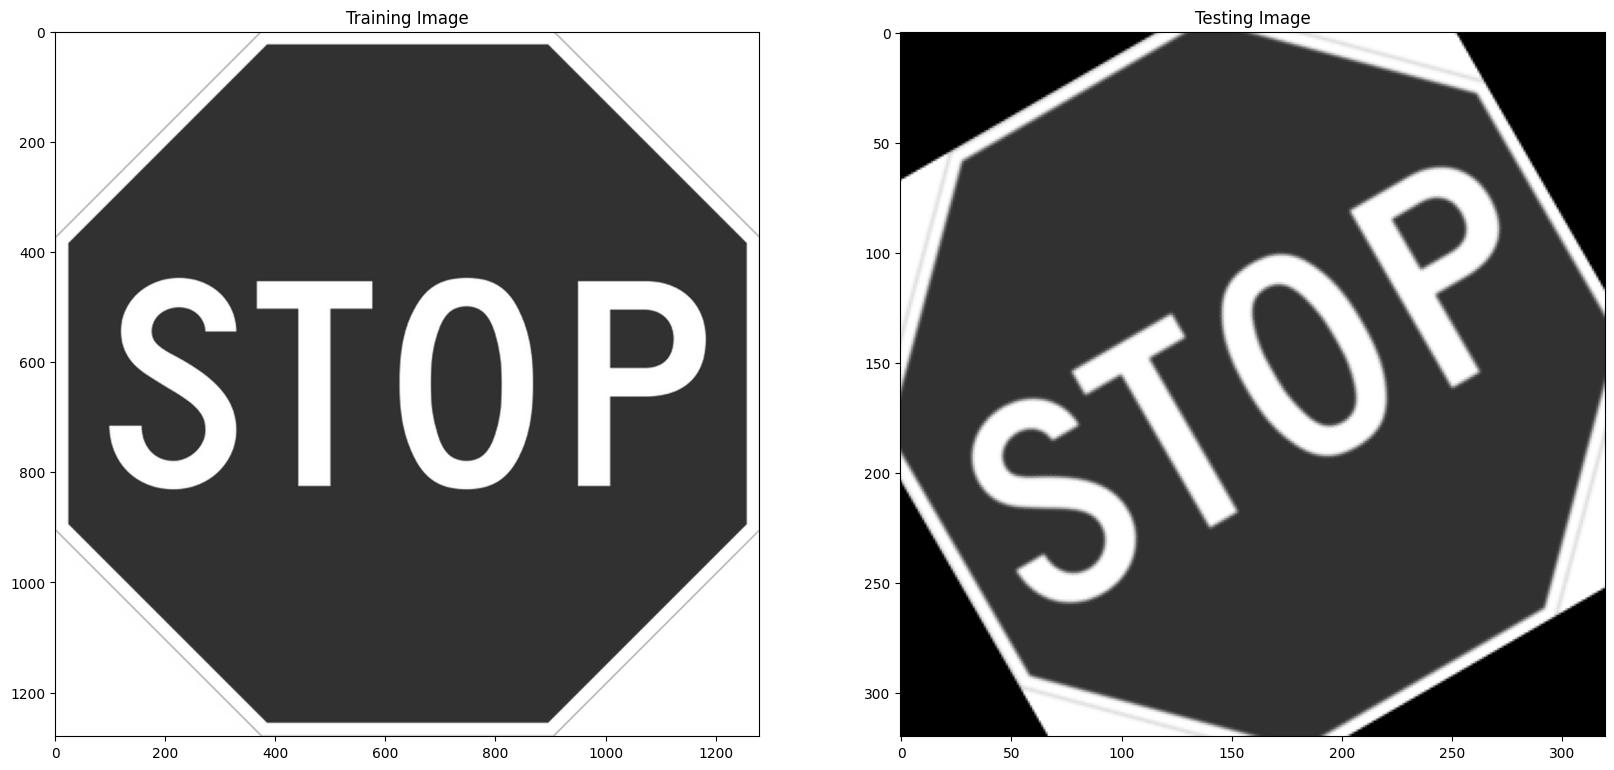

In [96]:
fx, plots = plt.subplots(1, 2, figsize=(20, 10))
plots[0].set_title("Training Image")
plots[0].imshow(training_rgb)
plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

In [97]:
# vytvorime detektor/deskriptor (maximalny pocet vyznacnych bodov)
sift = cv2.SIFT_create(800)
# detekujeme vyznacne body a ich popis pre predlohu
train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
# detekujeme vyznacne body a ich popis pre testovaci obraz
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

Number of Keypoints Detected In The Training Image:  800
Number of Keypoints Detected In The Testing Image:  56


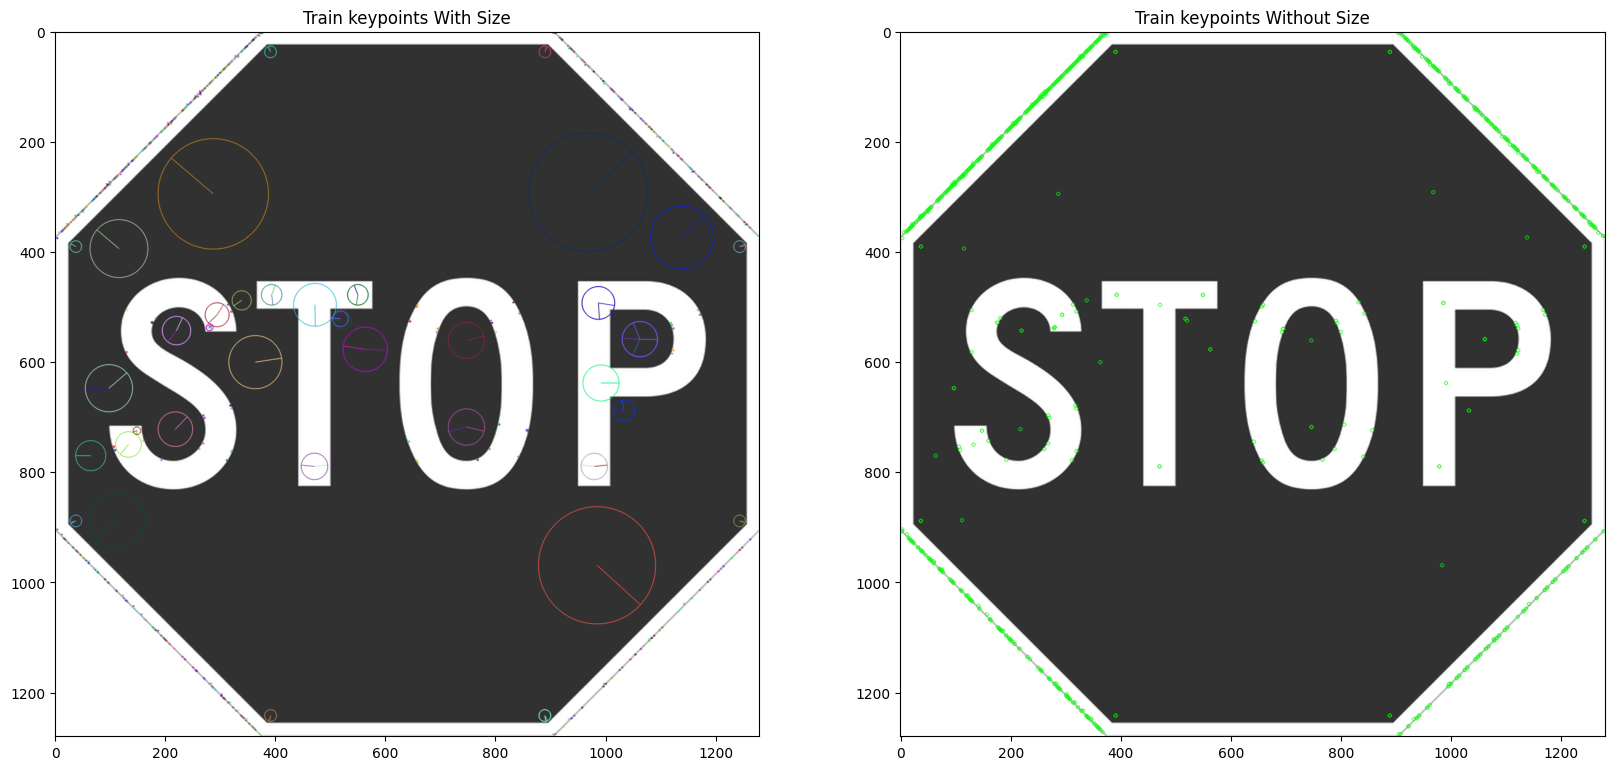

In [98]:
# pomocne premenne pre obrazy
keypoints_without_size = np.copy(training_rgb)
keypoints_with_size = np.copy(training_rgb)
# do pomocneho obrazu vykreslime vyznacne bez mierky; zmmena farby(R,G,B)
cv2.drawKeypoints(
    training_rgb, train_keypoints, keypoints_without_size, color=(0, 255, 0)
)
# do pomocneho obrazu vykreslime vyznacne body v s mierkou
cv2.drawKeypoints(
    training_rgb,
    train_keypoints,
    keypoints_with_size,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)
# vykreslenie
fx, plots = plt.subplots(1, 2, figsize=(20, 10))
plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap="gray")
plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap="gray")
# vsimnime si, pocet vypisanych vyznacnych bodov a pocet zadanych bodov pre SIFT
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))
print("Number of Keypoints Detected In The Testing Image: ", len(test_keypoints))

In [99]:
# vytvorenie porovnavaca vyznacnych bodov
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

In [100]:
matches = bf.match(train_descriptor, test_descriptor)
# zhody zatiredime podla vzajomnej "vzdialenosti" (najlepsej zhody), triedime podla kluca = vzdialensot - pouzita lambda funkcia
matches = sorted(matches, key=lambda x: x.distance)

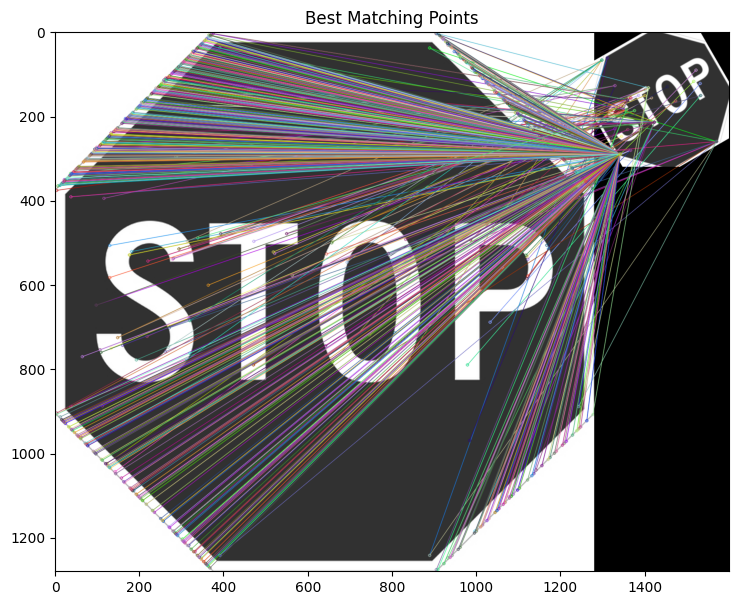


Number of Matching Keypoints Between The Training and Testing Images:  800


In [101]:
result = cv2.drawMatches(
    training_rgb,
    train_keypoints,
    test_gray,
    test_keypoints,
    matches,
    test_gray,
    flags=2,
)
plt.figure()
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("Best Matching Points")
plt.imshow(result)
plt.show()
print(
    "\nNumber of Matching Keypoints Between The Training and Testing Images: ",
    len(matches),
)

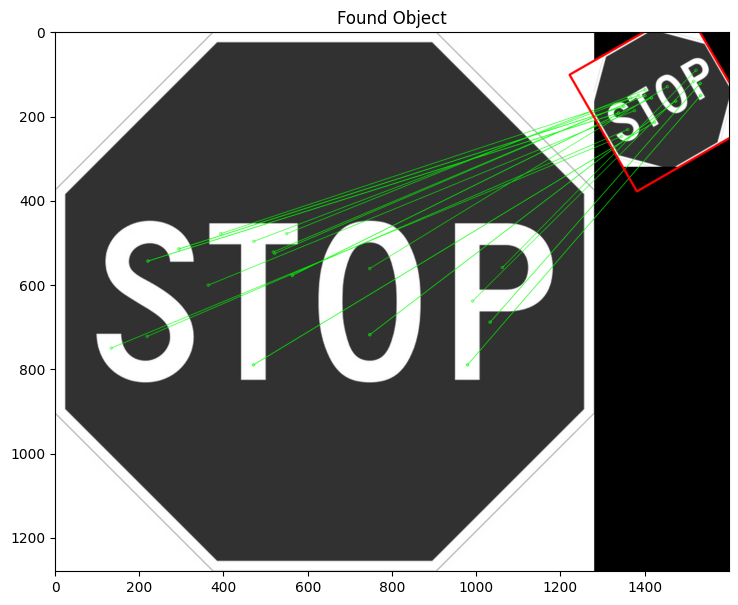

In [102]:
# Rectangle around STOP sign
good_matches = matches[:25]
src_pts = np.float32([train_keypoints[m.queryIdx].pt for m in good_matches]).reshape(
    -1, 1, 2
)
dst_pts = np.float32([test_keypoints[m.trainIdx].pt for m in good_matches]).reshape(
    -1, 1, 2
)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()
h, w = training_gray.shape[:2]
pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

dst = cv2.perspectiveTransform(pts, M)
dst += (w, 0)  # adding offset

draw_params = dict(
    matchColor=(0, 255, 0),  # draw matches in green color
    singlePointColor=None,
    matchesMask=matchesMask,  # draw only inliers
    flags=2,
)

img3 = cv2.drawMatches(
    training_gray,
    train_keypoints,
    test_gray,
    test_keypoints,
    good_matches,
    None,
    **draw_params
)

# Draw bounding box in Red
img3 = cv2.polylines(img3, [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)

plt.figure()
plt.title("Found Object")
plt.imshow(img3)
plt.show()

ULOHA 2

In [122]:
training_gray = cv2.imread("cert_train.jpg", 0)
training_rgb = cv2.cvtColor(training_gray, cv2.COLOR_BGR2RGB)

In [123]:
# zmensime rozlisenie obrazka
test_image_gray = cv2.imread('cert_prekryt.jpg', 0)
test_image = cv2.cvtColor(test_image_gray, cv2.COLOR_BGR2RGB)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]
# ulozime si pocet riadkov a stlpcov = rozmer testovacieho obrazka
# vytvorime rotacnu maticu; getRotationMatrix2D(stred_rotacie, uhol, mierka)
#rotation_matrix = cv2.getRotationMatrix2D((num_cols / 2, num_rows / 2), 0, 1)
# testovaci obrazok prekrutime podla rotacnej matice - zrotujeme
#test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))
test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

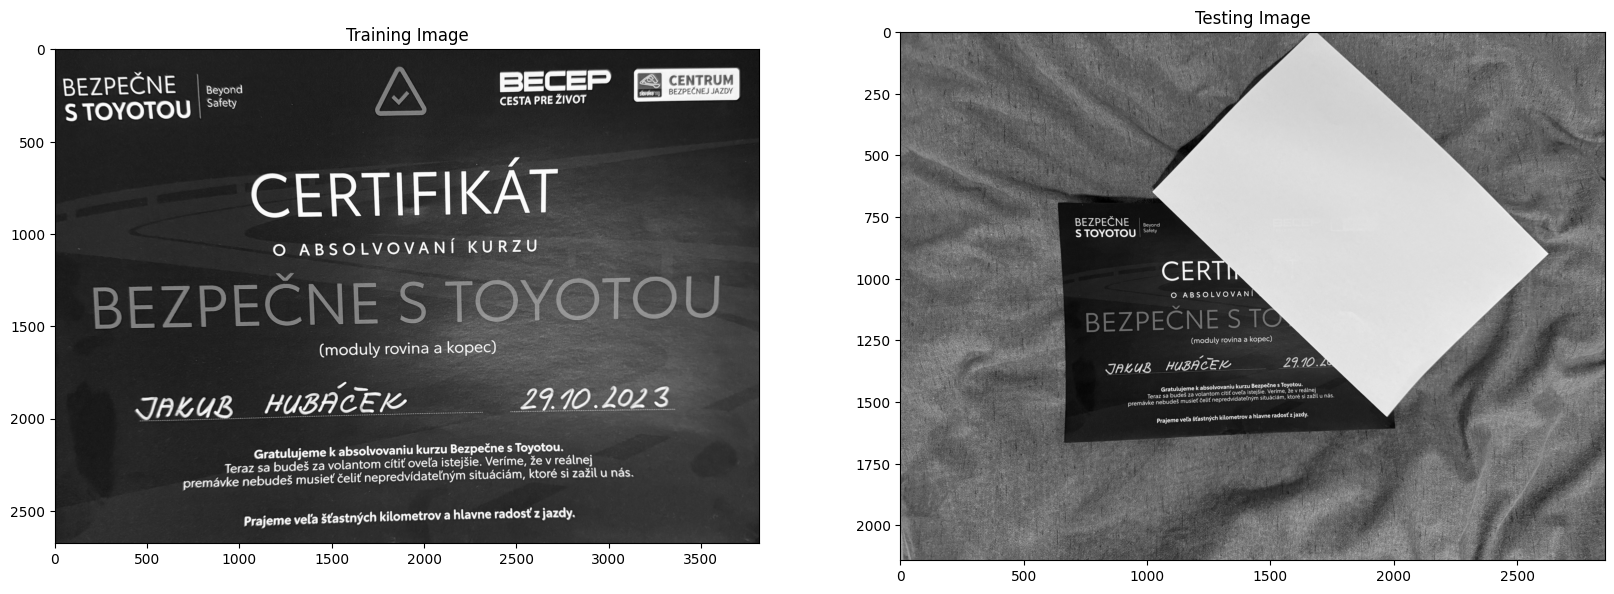

In [124]:
fx, plots = plt.subplots(1, 2, figsize=(20, 10))
plots[0].set_title("Training Image")
plots[0].imshow(training_rgb)
plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

In [125]:
# vytvorime detektor/deskriptor (maximalny pocet vyznacnych bodov)
sift = cv2.SIFT_create(1800)
# detekujeme vyznacne body a ich popis pre predlohu
train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
# detekujeme vyznacne body a ich popis pre testovaci obraz
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

Number of Keypoints Detected In The Training Image:  1801
Number of Keypoints Detected In The Testing Image:  1800


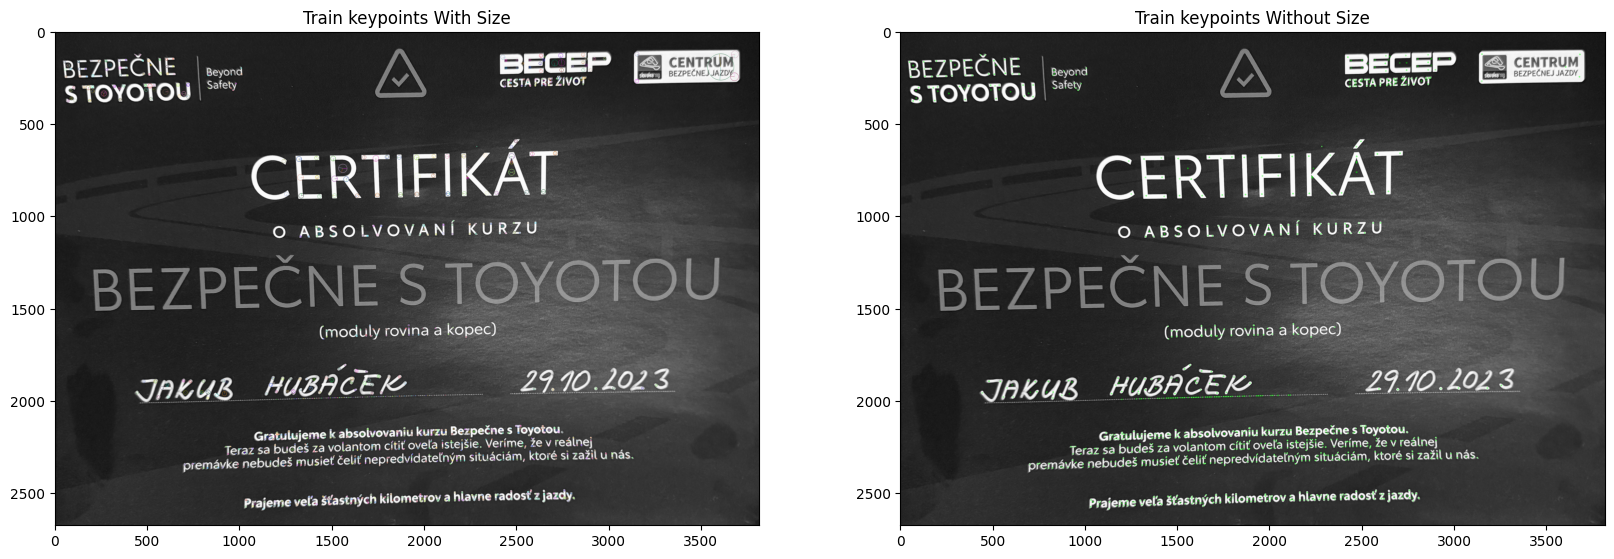

In [126]:
# pomocne premenne pre obrazy
keypoints_without_size = np.copy(training_rgb)
keypoints_with_size = np.copy(training_rgb)
# do pomocneho obrazu vykreslime vyznacne bez mierky; zmmena farby(R,G,B)
cv2.drawKeypoints(
    training_rgb, train_keypoints, keypoints_without_size, color=(0, 255, 0)
)
# do pomocneho obrazu vykreslime vyznacne body v s mierkou
cv2.drawKeypoints(
    training_rgb,
    train_keypoints,
    keypoints_with_size,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)
# vykreslenie
fx, plots = plt.subplots(1, 2, figsize=(20, 10))
plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap="gray")
plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap="gray")
# vsimnime si, pocet vypisanych vyznacnych bodov a pocet zadanych bodov pre SIFT
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))
print("Number of Keypoints Detected In The Testing Image: ", len(test_keypoints))

In [127]:
# vytvorenie porovnavaca vyznacnych bodov
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

In [128]:
matches = bf.match(train_descriptor, test_descriptor)
# zhody zatiredime podla vzajomnej "vzdialenosti" (najlepsej zhody), triedime podla kluca = vzdialensot - pouzita lambda funkcia
matches = sorted(matches, key=lambda x: x.distance)

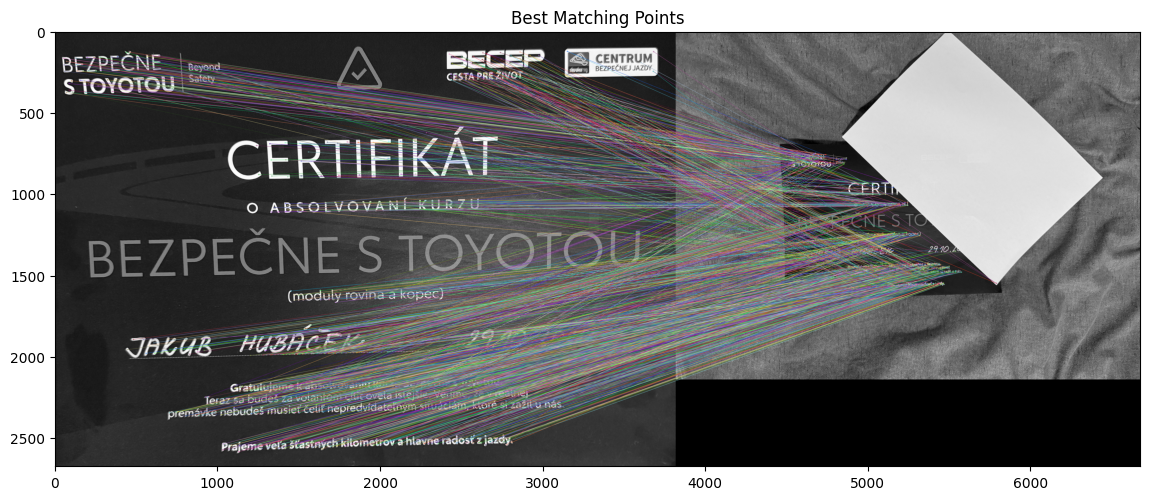


Number of Matching Keypoints Between The Training and Testing Images:  1801


In [129]:
result = cv2.drawMatches(
    training_rgb,
    train_keypoints,
    test_gray,
    test_keypoints,
    matches,
    test_gray,
    flags=2,
)
plt.figure()
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("Best Matching Points")
plt.imshow(result)
plt.show()
print(
    "\nNumber of Matching Keypoints Between The Training and Testing Images: ",
    len(matches),
)

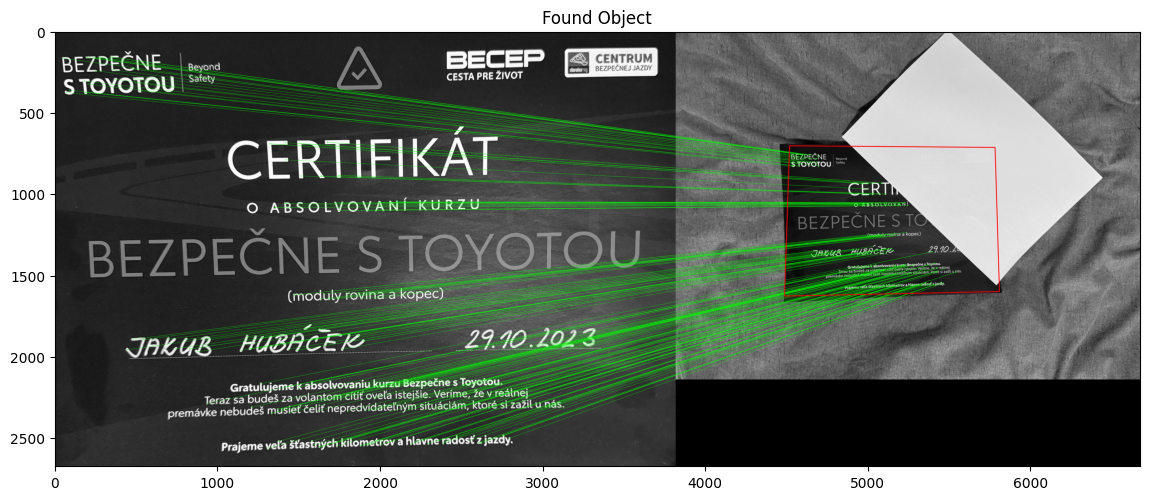

In [ ]:
good_matches = matches[:250]
src_pts = np.float32([train_keypoints[m.queryIdx].pt for m in good_matches]).reshape(
    -1, 1, 2
)
dst_pts = np.float32([test_keypoints[m.trainIdx].pt for m in good_matches]).reshape(
    -1, 1, 2
)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()
h, w = training_gray.shape[:2]
pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

dst = cv2.perspectiveTransform(pts, M)
dst += (w, 0) 

draw_params = dict(
    matchColor=(0, 255, 0),
    singlePointColor=None,
    matchesMask=matchesMask,
    flags=2,
)

img3 = cv2.drawMatches(
    training_gray,
    train_keypoints,
    test_gray,
    test_keypoints,
    good_matches,
    None,
    **draw_params
)

img3 = cv2.polylines(img3, [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)

plt.figure()
plt.title("Found Object")
plt.imshow(img3)
plt.show()